In [2]:
import pandas as pd
from matplotlib.ticker import FuncFormatter as ff
import matplotlib.pyplot as plt

# Exploratory data analysis and ad-hoc viz to see what questions can be answered using the data

In [8]:
DATA_DIR = "../data/"

dtypes = {
    "liftID": 'category',
    "resortID": 'category',
    "liftName": 'category',
    "status": 'category',
    "timeToRide": "int"
}

data = pd.read_csv(DATA_DIR + "lifts_status_changes.csv", dtype=dtypes, converters={'timestamp':pd.to_datetime})

In [9]:
whis_alpine = [
    "Harmony 6 Express",
    "Peak Express",
    "Symphony Express",
    "T-Bars"
]

black_alpine = [
    "7th Heaven Express",
    "Glacier Express",
    "Horstman T-Bar",
    "Showcase T-Bar"
]

## How are the opening times distributed for each (alpine) lift?

In [10]:
# From http://datadebrief.blogspot.com/2010/10/plotting-sunrise-sunset-times-in-python.html
 
def m2hm(x, i):
    h = int(x/60)
    m = int(x%60)
    return '%(h)02d:%(m)02d' % {'h':h,'m':m}

def dt2m(dt):
    return (dt.hour*60) + dt.minute

data['time_of_day'] = data['timestamp'].apply(lambda x:dt2m(x))

In [11]:
whis_alpine_data = data.query('liftName in @whis_alpine')
black_alpine_data = data.query('liftName in @black_alpine')

In [12]:
def lift_open_time_boxplot(df):
    df.liftName.cat.remove_unused_categories(inplace=True)
    fig = plt.figure(figsize=(14, 10))

    ax = fig.add_subplot(111)

    df.query('status=="O"').boxplot(
        column='time_of_day', by='liftName', ax=ax, vert=False)
    ax.xaxis.set_major_formatter(ff(m2hm))
    fig.suptitle('test title', fontsize=20)
    

    plt.show()
    
    #TBD: also add closing times

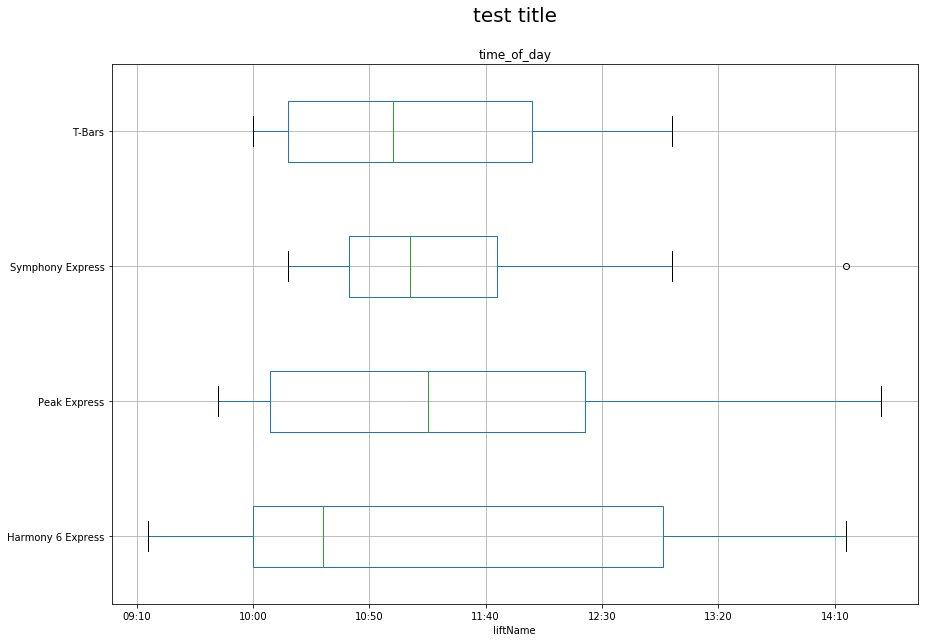

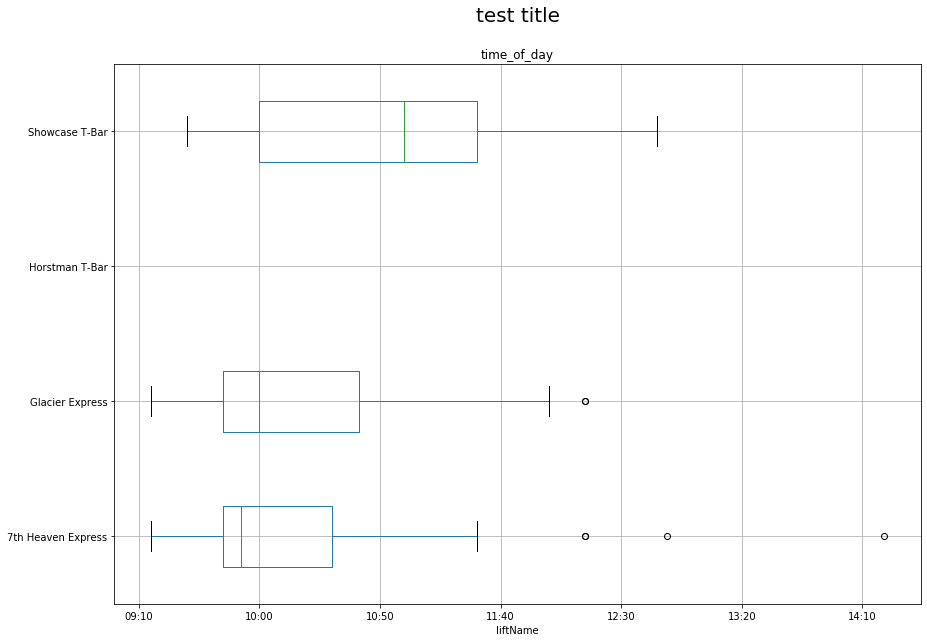

In [13]:
for df in [whis_alpine_data, black_alpine_data]:
    lift_open_time_boxplot(df)

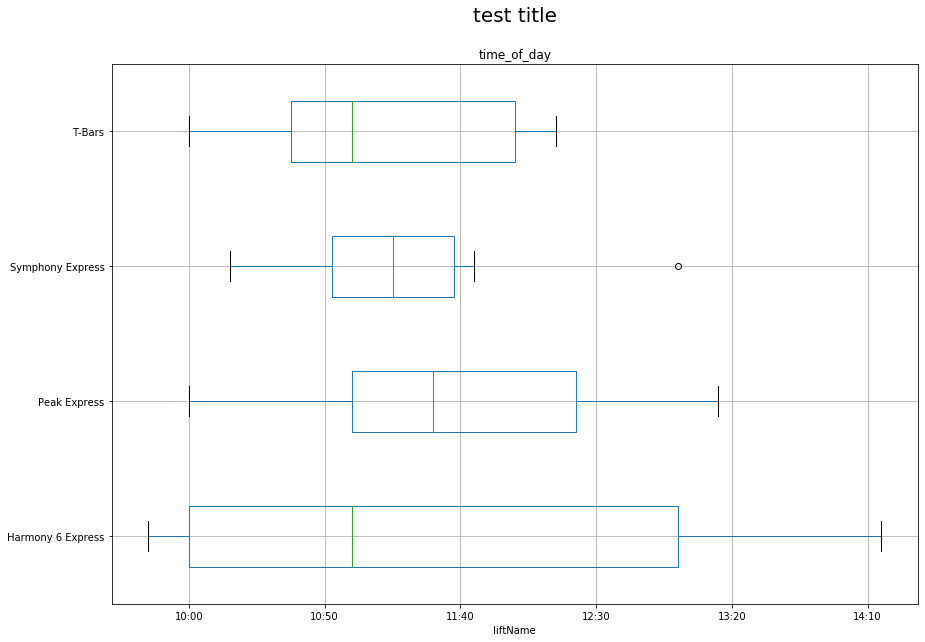

In [68]:
fig = plt.figure(figsize=(14, 10))
 
ax = fig.add_subplot(111)

whis_alpine_data.query('status=="O"').boxplot(column='time_of_day', by='liftName', ax=ax, vert=False)
ax.xaxis.set_major_formatter(ff(m2hm))
fig.suptitle('test title', fontsize=20)


plt.show()

### Filter by mountain, zone, weekend, weekday, holiday

## What percentage of opening hours is each lift open for the season?  Rank Results

## What percentage of days is each lift open during the season (for each season / distribution)?